## About Dataset

#### Dataset taken from: https://www.analyticsvidhya.com/datahack/contest/practice-problem-loan-prediction-iii/
#### Probelm Statement: Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train_ctrUa4K.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

## Data Exploration

### For Categorical Variables

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df['Loan_ID'].value_counts(dropna=False)

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64

##### gender

In [7]:
df['Gender'].value_counts(dropna=False)

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64

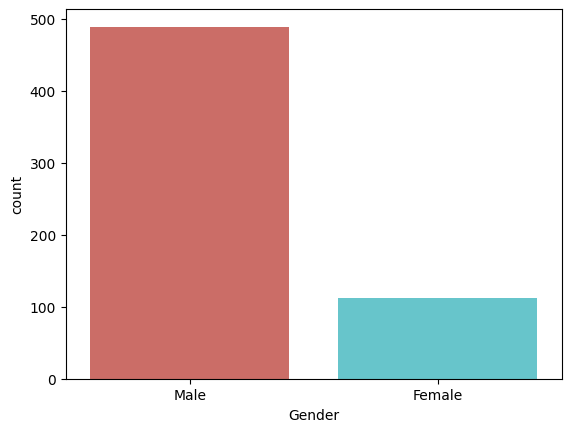

In [8]:
sns.countplot(x='Gender',data=df,palette='hls')
plt.show()

In [9]:
countMale = len(df[df.Gender=='Male'])
countFemale = len(df[df.Gender=='Female'])
countNull = len(df[df.Gender.isnull()])
totalCount = len(df.Gender)
countMale,countFemale,countNull,totalCount

(489, 112, 13, 614)

In [10]:
print("Male Percentage: {:.2f}%".format((countMale/totalCount)*100))
print("Female Percentage: {:.2f}%".format((countFemale/totalCount)*100))
print("Missing Value Percentage: {:.2f}%".format((countNull/totalCount)*100))


Male Percentage: 79.64%
Female Percentage: 18.24%
Missing Value Percentage: 2.12%


##### Marital Status

In [11]:
    df.Married.value_counts(dropna=False)

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64

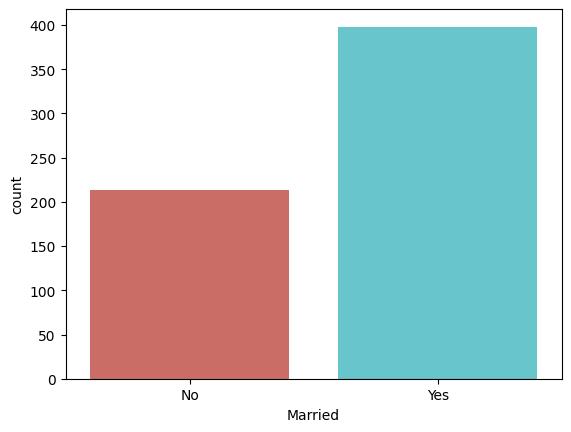

In [12]:
sns.countplot(x='Married',data=df,palette='hls')
plt.show()

In [13]:
countMarried = len(df[df.Married=='Yes'])
countUnmarried = len(df[df.Married=='No'])
countNull = len(df[df.Married.isnull()])

print("Married Percentage: {:.2f}%".format((countMarried/totalCount)*100))
print("Unmarried Percentage: {:.2f}%".format((countUnmarried/totalCount)*100))
print("Missing Value Percentage: {:.2f}%".format((countNull/totalCount)*100))


Married Percentage: 64.82%
Unmarried Percentage: 34.69%
Missing Value Percentage: 0.49%


##### Education

In [14]:
df['Education'].value_counts(dropna=False)

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

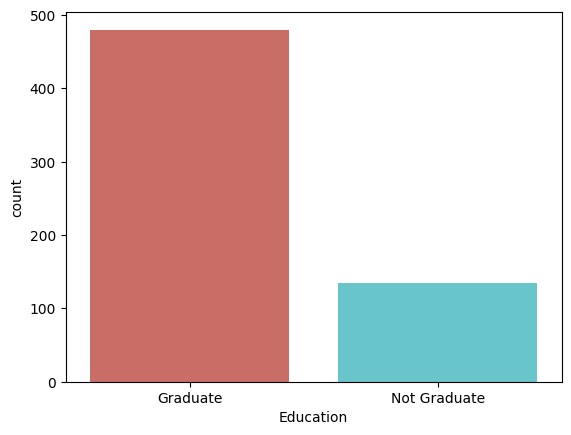

In [15]:
sns.countplot(x='Education',data=df,palette='hls')
plt.show()

In [16]:
countEducated = len(df[df.Education=='Graduate'])
countUneducated = len(df[df.Education=='Not Graduate'])
countNull = len(df[df.Education.isnull()])

print("Educated Percentage: {:.2f}%".format((countEducated/totalCount)*100))
print("Uneducated Percentage: {:.2f}%".format((countUneducated/totalCount)*100))
print("Missing Value Percentage: {:.2f}%".format((countNull/totalCount)*100))


Educated Percentage: 78.18%
Uneducated Percentage: 21.82%
Missing Value Percentage: 0.00%


##### self employed

In [17]:
df['Self_Employed'].value_counts(dropna=False)

Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64

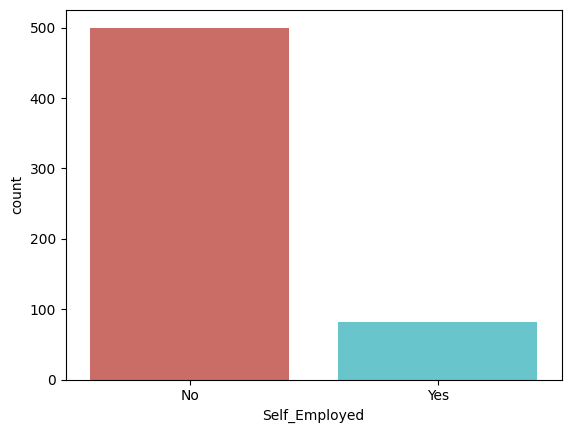

In [18]:
sns.countplot(x='Self_Employed',data=df,palette='hls')
plt.show()

In [19]:
countSelfEmployed = len(df[df.Self_Employed=='Yes'])
countNotSelfEmployed = len(df[df.Self_Employed=='No'])
countNull = len(df[df.Self_Employed.isnull()])

print("SelfEmployed Percentage: {:.2f}%".format((countSelfEmployed/totalCount)*100))
print("NotSelfEmployed Percentage: {:.2f}%".format((countNotSelfEmployed/totalCount)*100))
print("Missing Value Percentage: {:.2f}%".format((countNull/totalCount)*100))


SelfEmployed Percentage: 13.36%
NotSelfEmployed Percentage: 81.43%
Missing Value Percentage: 5.21%


##### Credit History

In [20]:
df['Credit_History'].value_counts(dropna=False)


Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64

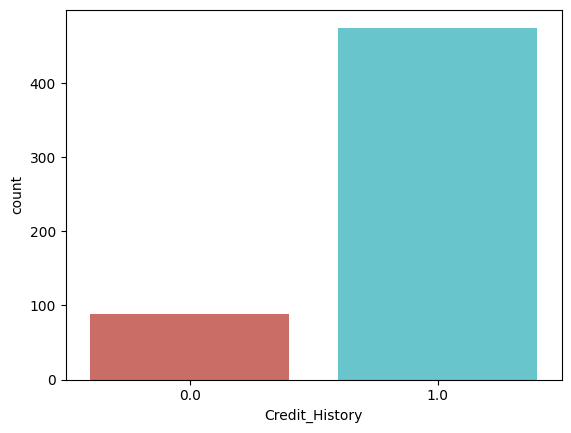

In [21]:
sns.countplot(x='Credit_History',data=df,palette='hls')
plt.show()

##### Loan Amount Term

In [22]:
df['Loan_Amount_Term'].value_counts(dropna=False)

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

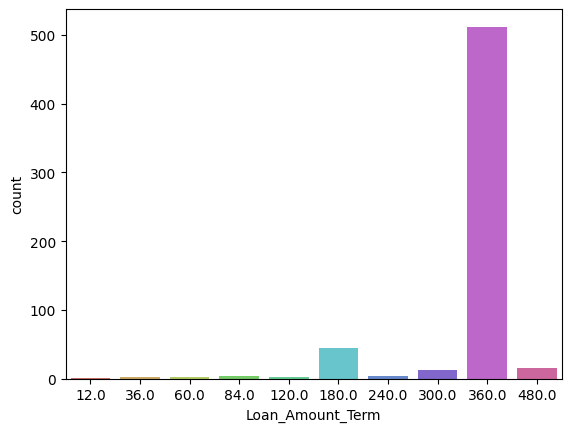

In [23]:
sns.countplot(x='Loan_Amount_Term',data=df,palette='hls')
plt.show()

##### Property Area

In [24]:
df['Property_Area'].value_counts(dropna=False)

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

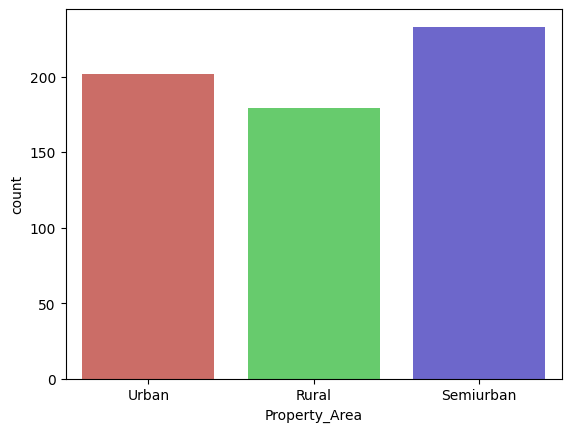

In [25]:
sns.countplot(x='Property_Area',data=df,palette='hls')
plt.show()

In [26]:
countUrban = len(df[df.Property_Area=='Urban'])
countRural = len(df[df.Property_Area=='Rural'])
countSemiurban = len(df[df.Property_Area=='Semiurban'])

print("Urban Percentage: {:.2f}%".format((countUrban/totalCount)*100))
print("Rural Percentage: {:.2f}%".format((countRural/totalCount)*100))
print("Semiurban  Percentage: {:.2f}%".format((countSemiurban/totalCount)*100))


Urban Percentage: 32.90%
Rural Percentage: 29.15%
Semiurban  Percentage: 37.95%


##### Loan Status

In [27]:
df['Loan_Status'].value_counts(dropna=False)

Loan_Status
Y    422
N    192
Name: count, dtype: int64

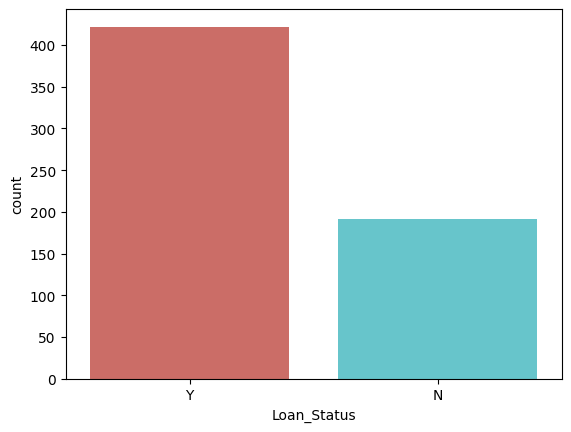

In [28]:
sns.countplot(x='Loan_Status',data=df,palette='hls')
plt.show()

In [29]:
countApprovedLoan = len(df[df.Loan_Status=='Y'])
countRejectedLoan = len(df[df.Loan_Status=='N'])
print("ApprovedLoan Percentage: {:.2f}%".format((countApprovedLoan/totalCount)*100))
print("RejectedLoan Percentage: {:.2f}%".format((countRejectedLoan/totalCount)*100))


ApprovedLoan Percentage: 68.73%
RejectedLoan Percentage: 31.27%


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### For Numerical Variables

In [31]:
df.select_dtypes(include=np.number).columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [32]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

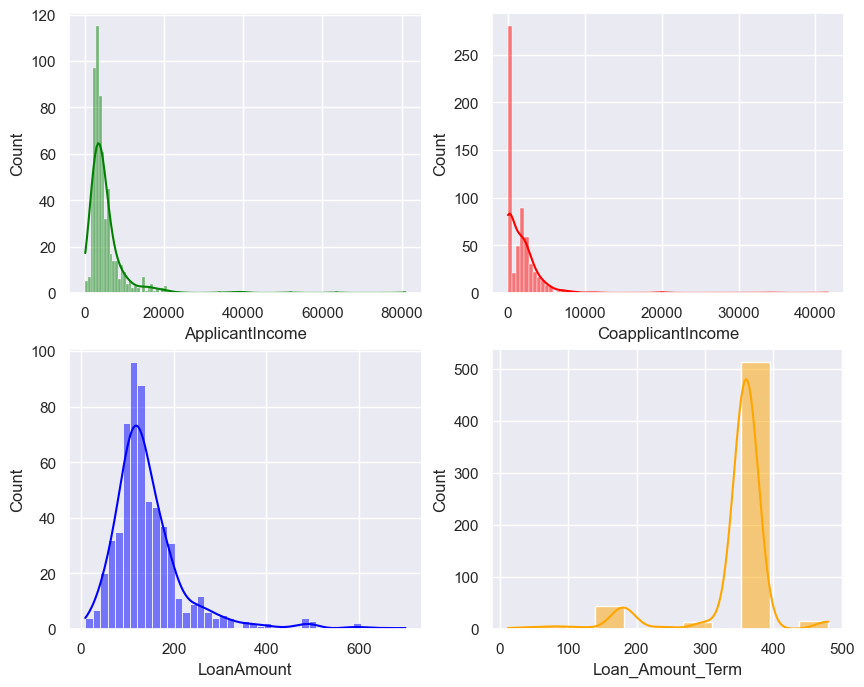

In [33]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,2,figsize=(10,8))

sns.histplot(x='ApplicantIncome',data=df,ax=axs[0,0],kde=True,color='green')
sns.histplot(x='CoapplicantIncome',data=df,ax=axs[0,1],kde=True,color='red')
sns.histplot(x='LoanAmount',data=df,ax=axs[1,0],kde=True,color='blue')
sns.histplot(x='Loan_Amount_Term',data=df,ax=axs[1,1],kde=True,color='orange')


#### Violin plot

In [34]:
#helps in finding outliers,peaks,IQR,mean
# right(tail towards right) skewed= poitively skewed, left(tail towards left) skewed = negatively skewed

<Axes: ylabel='Loan_Amount_Term'>

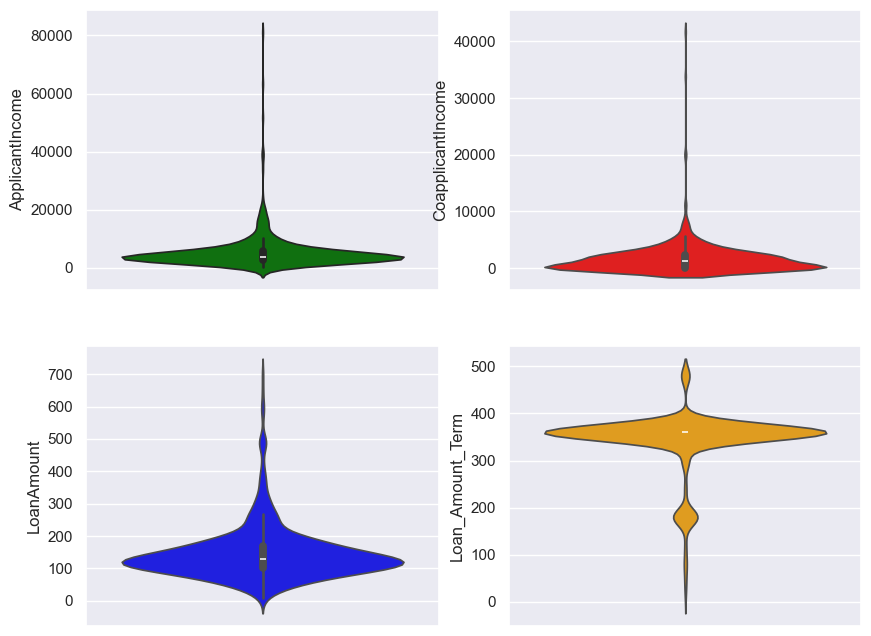

In [35]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,2,figsize=(10,8))

sns.violinplot(y='ApplicantIncome',data=df,ax=axs[0,0],color='green')
sns.violinplot(y='CoapplicantIncome',data=df,ax=axs[0,1],color='red')
sns.violinplot(y='LoanAmount',data=df,ax=axs[1,0],color='blue')
sns.violinplot(y='Loan_Amount_Term',data=df,ax=axs[1,1],color='orange')


##### bivariate analysis

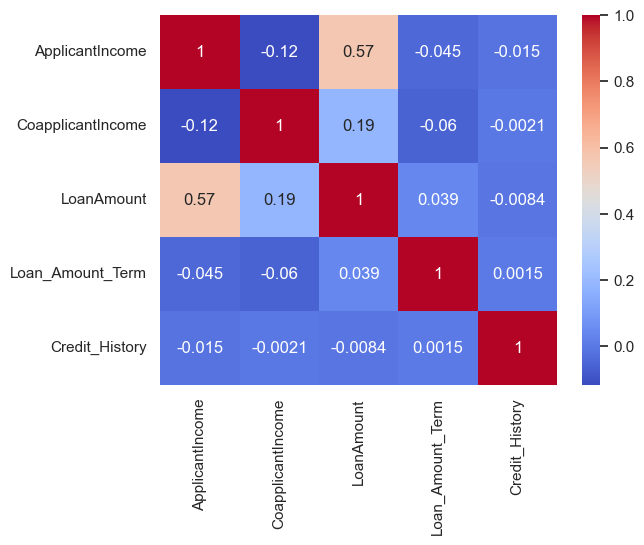

In [36]:
#Heatmap
corr_matrix = df.corr(numeric_only=True)
#Display the heatmap
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

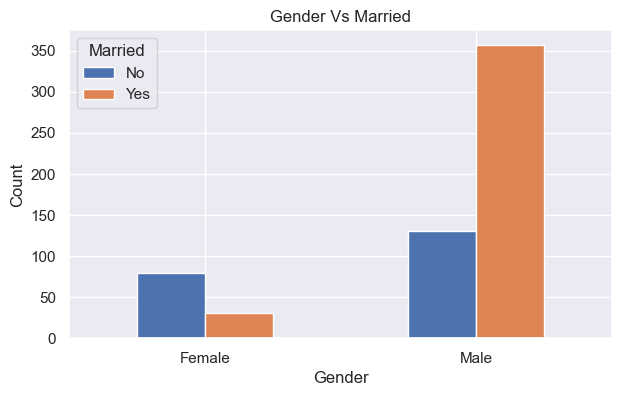

In [37]:
pd.crosstab(df.Gender,df.Married).plot(kind='bar',figsize=(7,4))
plt.title('Gender Vs Married')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

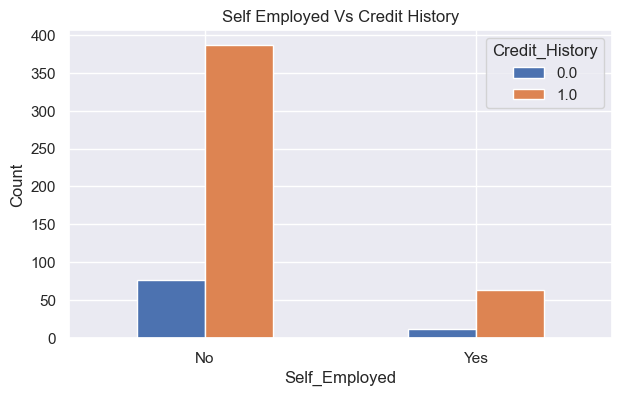

In [38]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind='bar',figsize=(7,4))
plt.title('Self Employed Vs Credit History')
plt.xlabel('Self_Employed')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

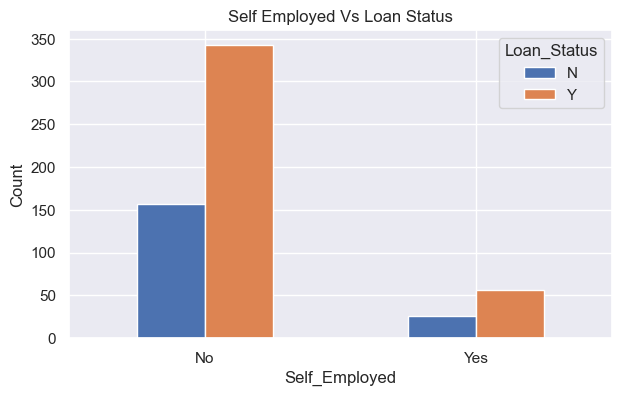

In [39]:
pd.crosstab(df.Self_Employed,df.Loan_Status).plot(kind='bar',figsize=(7,4))
plt.title('Self Employed Vs Loan Status')
plt.xlabel('Self_Employed')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

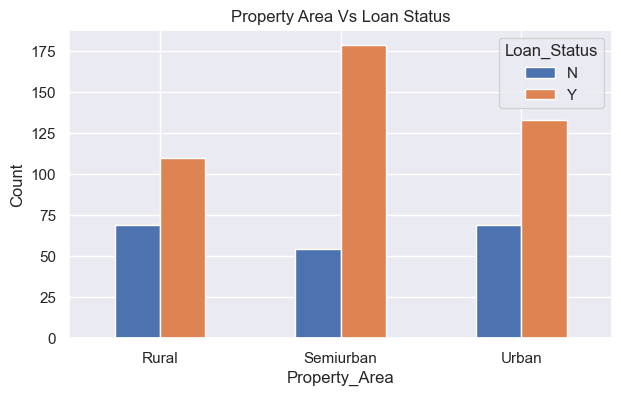

In [40]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind='bar',figsize=(7,4))
plt.title('Property Area Vs Loan Status')
plt.xlabel('Property_Area')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

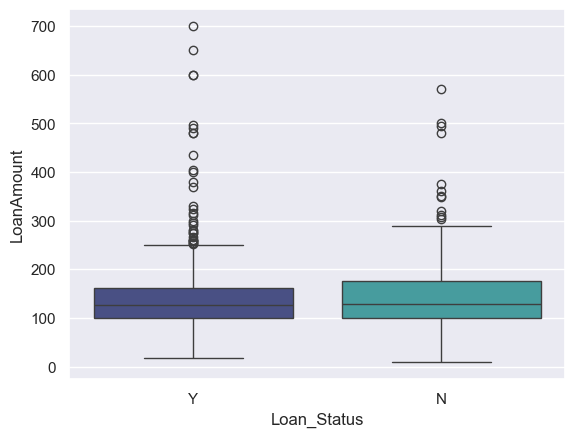

In [41]:
sns.boxplot(y='LoanAmount',x='Loan_Status',data=df,palette='mako')

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

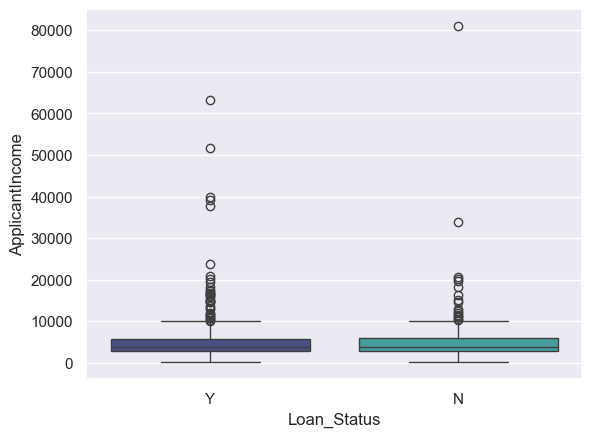

In [42]:
sns.boxplot(y='ApplicantIncome',x='Loan_Status',data=df,palette='mako')


<Axes: xlabel='Loan_Status', ylabel='CoapplicantIncome'>

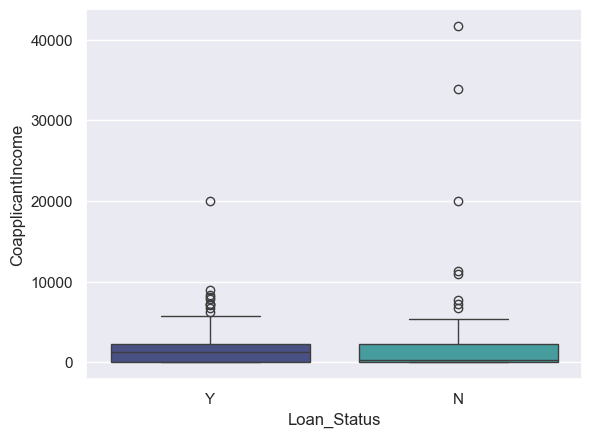

In [43]:
sns.boxplot(y='CoapplicantIncome',x='Loan_Status',data=df,palette='mako')

Text(0, 0.5, 'Applicant Income')

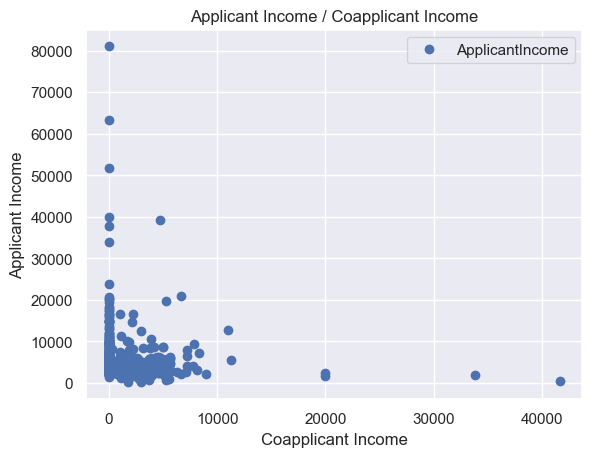

In [44]:
df.plot(x='CoapplicantIncome',y='ApplicantIncome',style='o')
plt.title('Applicant Income / Coapplicant Income')
plt.xlabel('Coapplicant Income')
plt.ylabel('Applicant Income')

#### NULL Values

In [45]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
pip install missingno


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

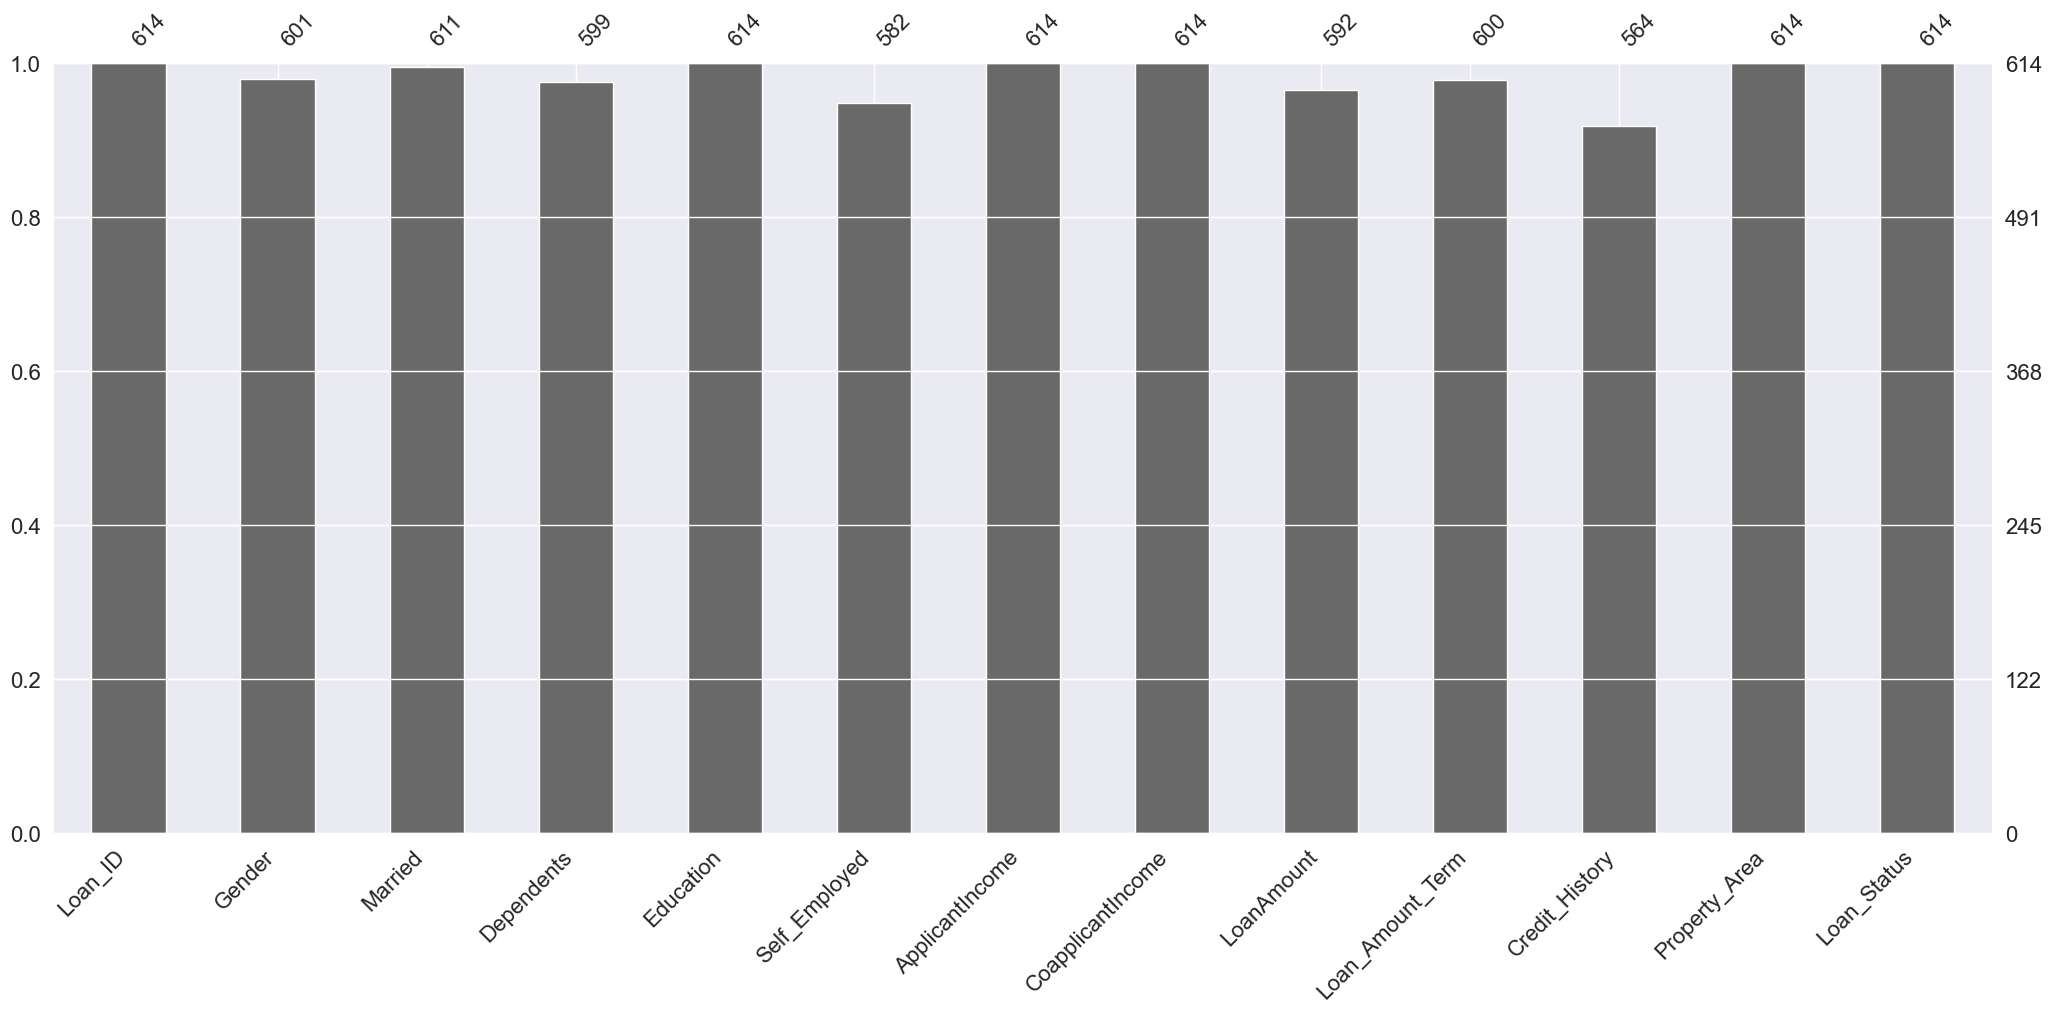

In [47]:
import missingno as mso
mso.bar(df)

## Data Preprocessing

#### Drop useless variables

In [48]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [49]:
df = df.drop(['Loan_ID'],axis=1)

In [50]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [51]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Handle missing values

In [52]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [53]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [54]:
df.isnull().sum()

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [55]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [56]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [57]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [58]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

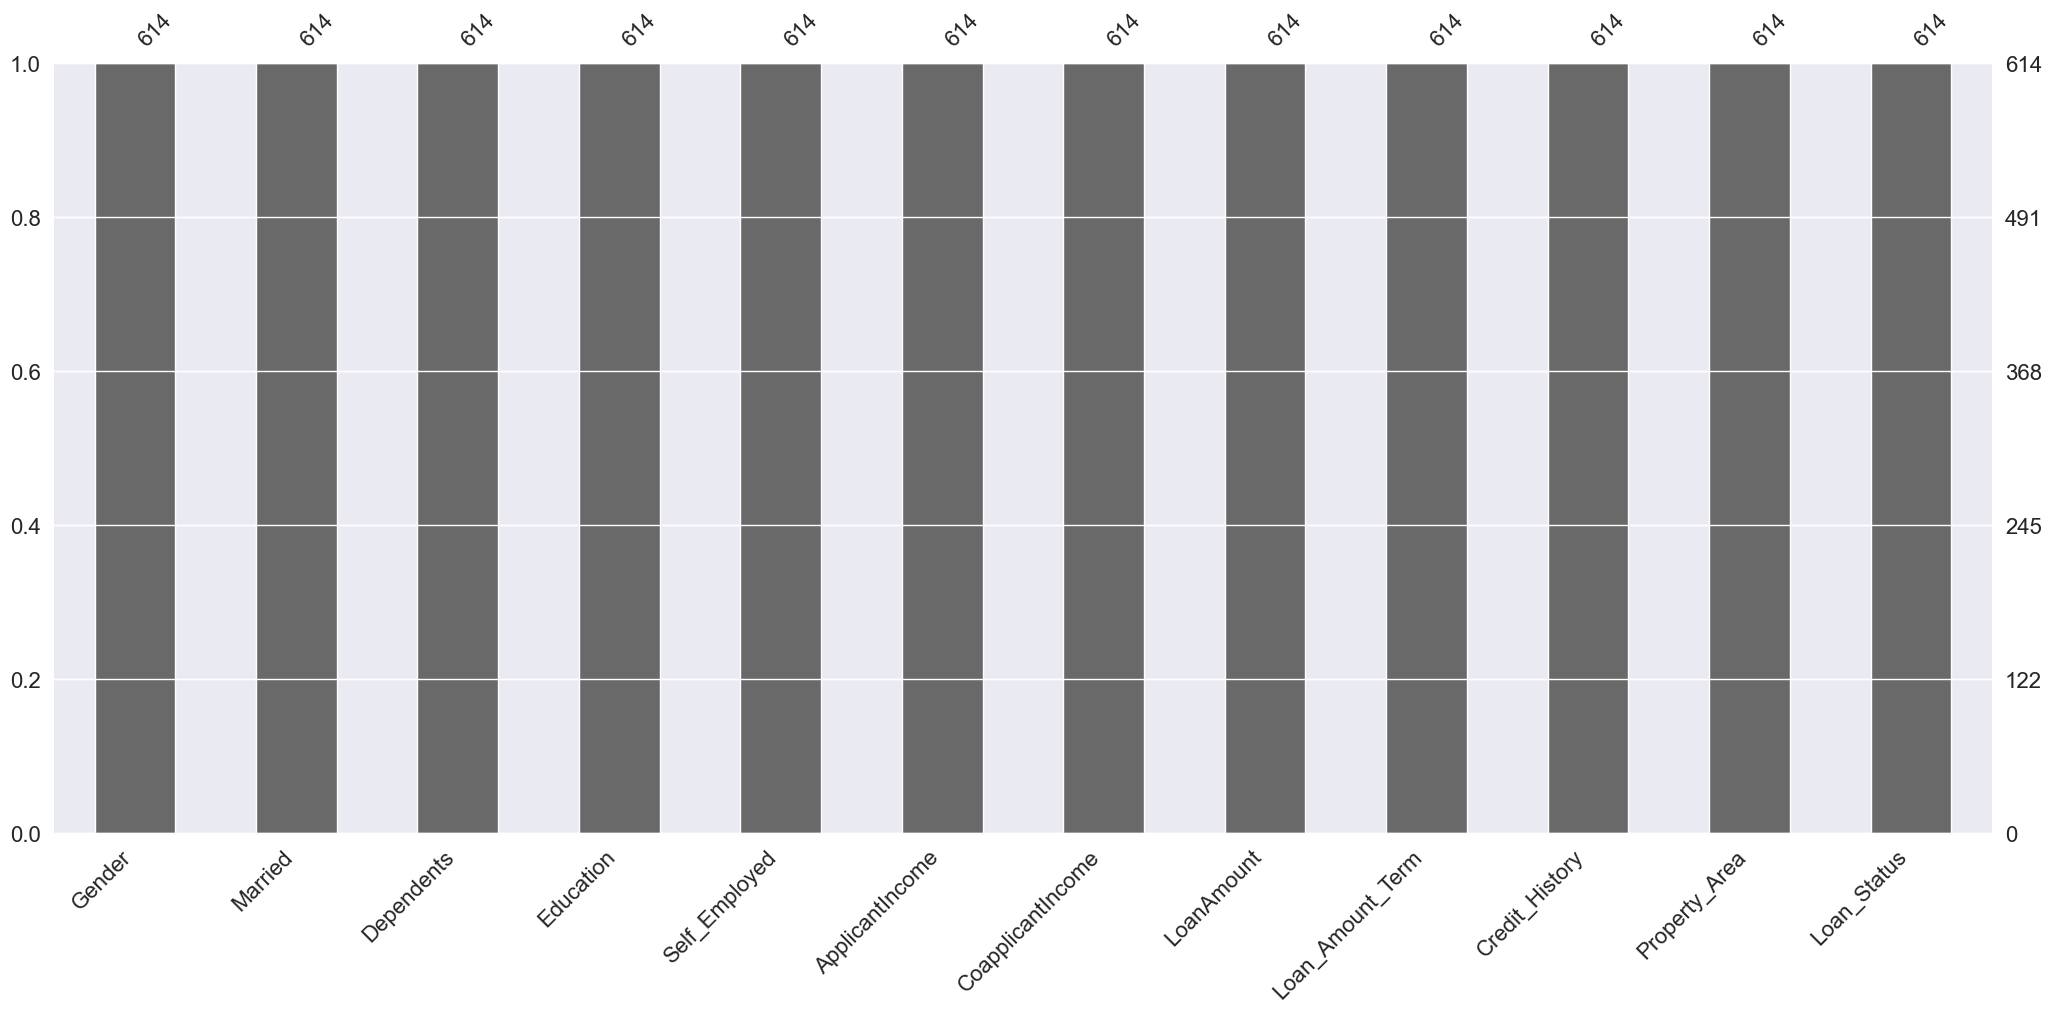

In [59]:
mso.bar(df)

### Categorical Variable to Machine Understandable Variables

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [61]:
df = pd.get_dummies(df)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Gender_Female            614 non-null    bool   
 6   Gender_Male              614 non-null    bool   
 7   Married_No               614 non-null    bool   
 8   Married_Yes              614 non-null    bool   
 9   Dependents_0             614 non-null    bool   
 10  Dependents_1             614 non-null    bool   
 11  Dependents_2             614 non-null    bool   
 12  Dependents_3+            614 non-null    bool   
 13  Education_Graduate       614 non-null    bool   
 14  Education_Not Graduate   6

In [63]:
df = df.drop(['Gender_Female','Married_No','Education_Not Graduate','Self_Employed_No','Loan_Status_N'],axis=1)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Gender_Male              614 non-null    bool   
 6   Married_Yes              614 non-null    bool   
 7   Dependents_0             614 non-null    bool   
 8   Dependents_1             614 non-null    bool   
 9   Dependents_2             614 non-null    bool   
 10  Dependents_3+            614 non-null    bool   
 11  Education_Graduate       614 non-null    bool   
 12  Self_Employed_Yes        614 non-null    bool   
 13  Property_Area_Rural      614 non-null    bool   
 14  Property_Area_Semiurban  6

In [65]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True
1,4583,1508.0,128.000000,360.0,1.0,True,True,False,True,False,False,True,False,True,False,False,False
2,3000,0.0,66.000000,360.0,1.0,True,True,True,False,False,False,True,True,False,False,True,True
3,2583,2358.0,120.000000,360.0,1.0,True,True,True,False,False,False,False,False,False,False,True,True
4,6000,0.0,141.000000,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True


In [66]:
for col in df.columns:
  if(df[col].dtype=='bool'):
    df[col] = df[col].astype(np.uint8)

In [67]:
df.dtypes

ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Gender_Male                  uint8
Married_Yes                  uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Education_Graduate           uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
Loan_Status_Y                uint8
dtype: object

In [68]:
newColName = {
    'Married_Yes':'Married',
    'Self_Employed_Yes':'Self_Employed',
    'Loan_Status_Y':'Loan_Status'
}
df.rename(columns=newColName,inplace=True)

In [69]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,0,1,0,0,1,0,1,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,1,0,0,0,1,1,0,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1


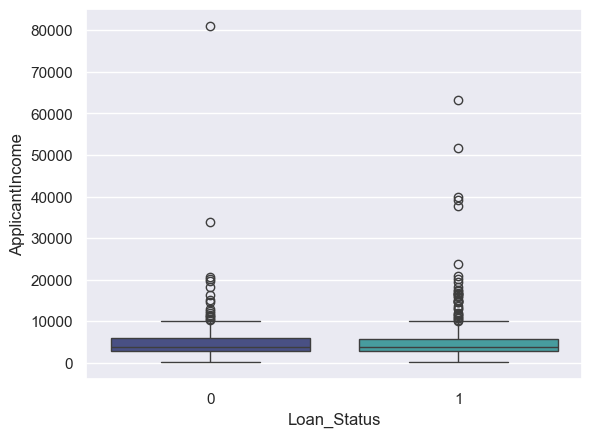

In [70]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");

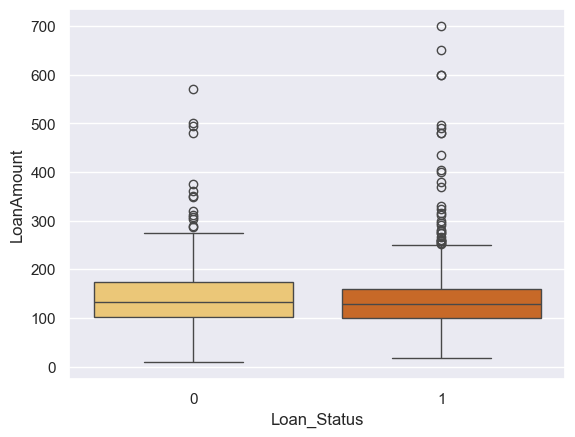

In [71]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr");


#### Remove Outliers

In [72]:
Q1 = df.quantile(0.25)
Q1

ApplicantIncome            2877.50
CoapplicantIncome             0.00
LoanAmount                  100.25
Loan_Amount_Term            360.00
Credit_History                1.00
Gender_Male                   1.00
Married                       0.00
Dependents_0                  0.00
Dependents_1                  0.00
Dependents_2                  0.00
Dependents_3+                 0.00
Education_Graduate            1.00
Self_Employed                 0.00
Property_Area_Rural           0.00
Property_Area_Semiurban       0.00
Property_Area_Urban           0.00
Loan_Status                   0.00
Name: 0.25, dtype: float64

In [73]:
Q3 = df.quantile(0.75)
Q3

ApplicantIncome            5795.00
CoapplicantIncome          2297.25
LoanAmount                  164.75
Loan_Amount_Term            360.00
Credit_History                1.00
Gender_Male                   1.00
Married                       1.00
Dependents_0                  1.00
Dependents_1                  0.00
Dependents_2                  0.00
Dependents_3+                 0.00
Education_Graduate            1.00
Self_Employed                 0.00
Property_Area_Rural           1.00
Property_Area_Semiurban       1.00
Property_Area_Urban           1.00
Loan_Status                   1.00
Name: 0.75, dtype: float64

In [74]:
IQR = Q3-Q1
IQR

ApplicantIncome            2917.50
CoapplicantIncome          2297.25
LoanAmount                   64.50
Loan_Amount_Term              0.00
Credit_History                0.00
Gender_Male                   0.00
Married                       1.00
Dependents_0                  1.00
Dependents_1                  0.00
Dependents_2                  0.00
Dependents_3+                 0.00
Education_Graduate            0.00
Self_Employed                 0.00
Property_Area_Rural           1.00
Property_Area_Semiurban       1.00
Property_Area_Urban           1.00
Loan_Status                   1.00
dtype: float64

In [75]:
(df < (Q1 - 1.5 * IQR)).sum()

ApplicantIncome              0
CoapplicantIncome            0
LoanAmount                   0
Loan_Amount_Term            73
Credit_History              89
Gender_Male                112
Married                      0
Dependents_0                 0
Dependents_1                 0
Dependents_2                 0
Dependents_3+                0
Education_Graduate         134
Self_Employed                0
Property_Area_Rural          0
Property_Area_Semiurban      0
Property_Area_Urban          0
Loan_Status                  0
dtype: int64

In [76]:
(df > (Q3 + 1.5 * IQR)).sum()

ApplicantIncome             50
CoapplicantIncome           18
LoanAmount                  41
Loan_Amount_Term            15
Credit_History               0
Gender_Male                  0
Married                      0
Dependents_0                 0
Dependents_1               102
Dependents_2               101
Dependents_3+               51
Education_Graduate           0
Self_Employed               82
Property_Area_Rural          0
Property_Area_Semiurban      0
Property_Area_Urban          0
Loan_Status                  0
dtype: int64

In [77]:
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [78]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
13,1853,2840.0,114.000000,360.0,1.0,1,0,1,0,0,0,1,0,1,0,0,0
15,4950,0.0,125.000000,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
19,2600,3500.0,115.000000,360.0,1.0,1,1,1,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,3182,2917.0,161.000000,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
586,2297,1522.0,104.000000,360.0,1.0,1,1,1,0,0,0,1,0,0,0,1,1
588,4750,0.0,94.000000,360.0,1.0,1,0,1,0,0,0,1,0,0,1,0,1
603,3676,4301.0,172.000000,360.0,1.0,1,0,1,0,0,0,1,0,1,0,0,1


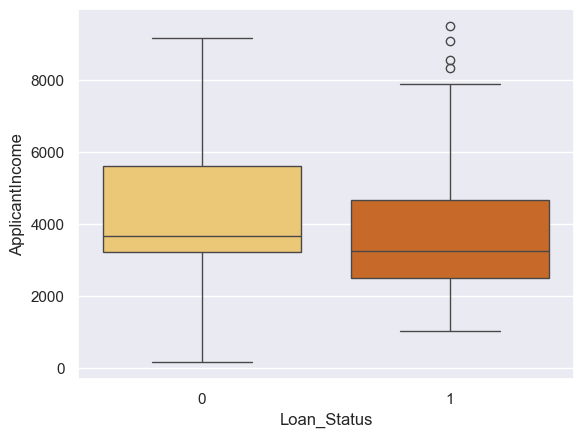

In [79]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="YlOrBr");

### Uniform Distribution

<Axes: xlabel='LoanAmount', ylabel='Count'>

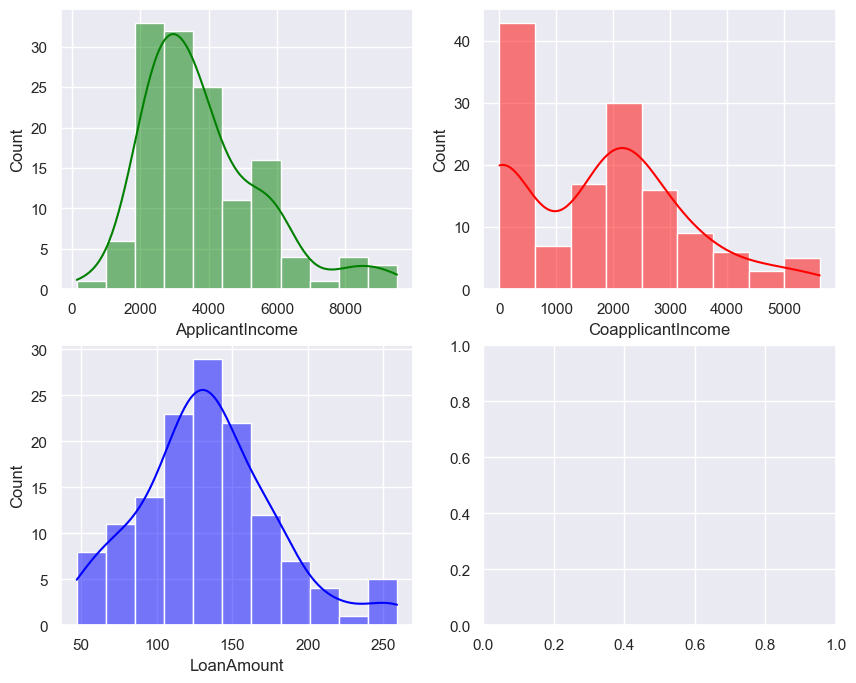

In [80]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,2,figsize=(10,8))

sns.histplot(x='ApplicantIncome',data=df,ax=axs[0,0],kde=True,color='green')
sns.histplot(x='CoapplicantIncome',data=df,ax=axs[0,1],kde=True,color='red')
sns.histplot(x='LoanAmount',data=df,ax=axs[1,0],kde=True,color='blue')



In [81]:
df.ApplicantIncome=np.sqrt(df.ApplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome) 

<Axes: xlabel='LoanAmount', ylabel='Count'>

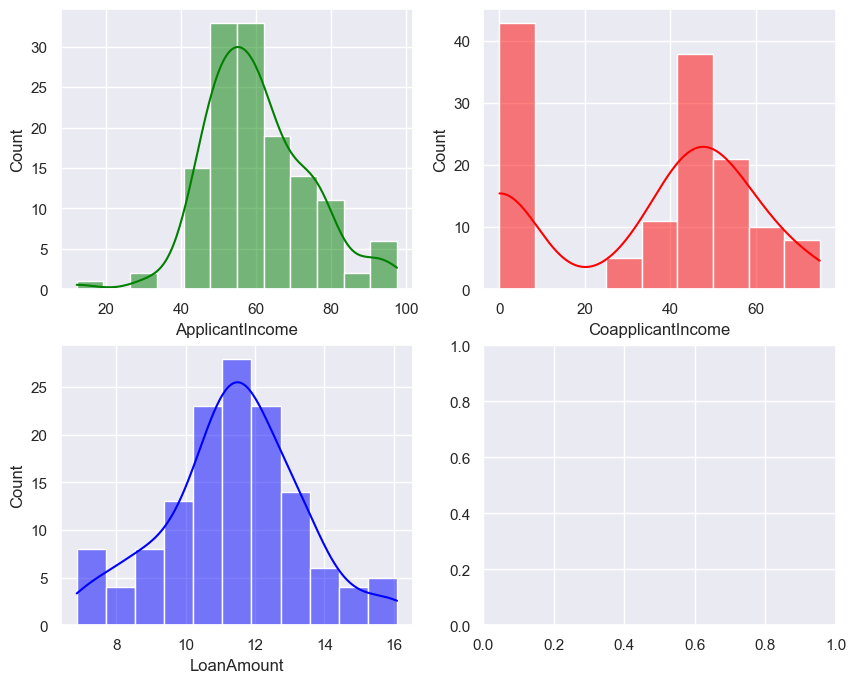

In [82]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,2,figsize=(10,8))

sns.histplot(x='ApplicantIncome',data=df,ax=axs[0,0],kde=True,color='green')
sns.histplot(x='CoapplicantIncome',data=df,ax=axs[0,1],kde=True,color='red')
sns.histplot(x='LoanAmount',data=df,ax=axs[1,0],kde=True,color='blue')



In [83]:
X = df.drop(['Loan_Status'], axis = 1)
y = df['Loan_Status']

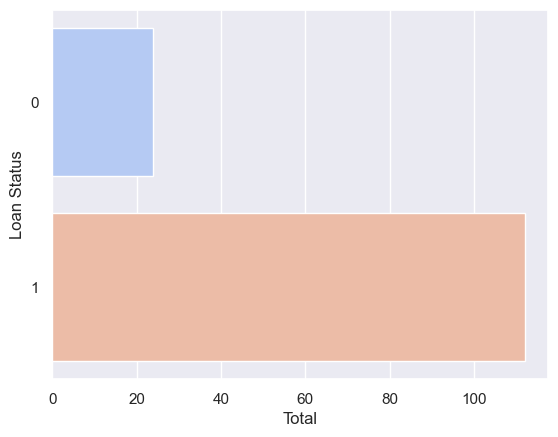

In [84]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

In [85]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [86]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [87]:
X, y = SMOTE().fit_resample(X,y)

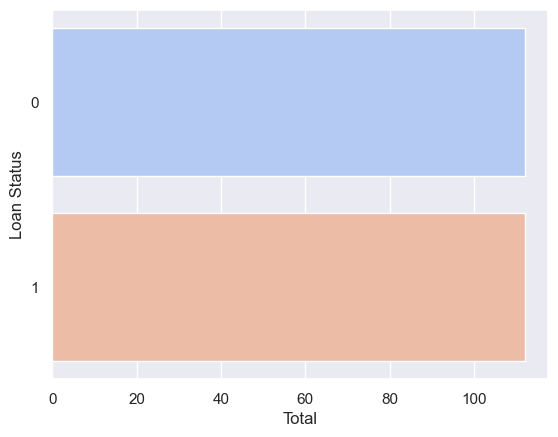

In [88]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

In [89]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,76.478755,0.000000,12.100089,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1
1,77.459667,0.000000,11.874342,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1
2,43.046487,53.291650,10.677078,360.0,1.0,1,0,1,0,0,0,1,0,1,0,0
3,70.356236,0.000000,11.180340,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1
4,50.990195,59.160798,10.723805,360.0,1.0,1,1,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,57.717400,0.000000,12.176796,360.0,1.0,1,0,1,0,0,0,1,0,0,0,0
220,58.979612,40.491840,8.871728,360.0,1.0,1,1,1,0,0,0,1,0,1,0,0
221,64.879221,46.098369,11.936614,360.0,1.0,1,0,1,0,0,0,1,0,0,0,0
222,49.942688,0.000000,8.655264,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1


In [90]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [91]:
X

array([[0.75334456, 0.        , 0.56771332, ..., 0.        , 0.        ,
        1.        ],
       [0.7648493 , 0.        , 0.54327603, ..., 0.        , 0.        ,
        1.        ],
       [0.3612302 , 0.71055534, 0.41367148, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.61729804, 0.61464492, 0.55001697, ..., 0.        , 0.        ,
        0.        ],
       [0.44211312, 0.        , 0.19480885, ..., 0.        , 0.        ,
        1.        ],
       [0.61093192, 0.        , 0.65009522, ..., 0.        , 0.        ,
        0.        ]])

##### train test split

In [92]:
from sklearn.model_selection  import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 45)

In [93]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (156, 16)
Shape of X_test: (68, 16)
Shape of y_train: (156,)
Shape of y_test: (68,)


In [94]:
pip install xgboost



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Model Training

In [95]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Helper function to evaluate models
def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    print(f"\n📌 Results for {name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test,y_pred))
    return accuracy_score(y_test, y_pred), roc_auc_score(y_test, y_pred)
    
# 2. Logistic Regression

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
evaluate_model(log_reg, X_test, y_test, "Logistic Regression")

# 3. Random Forest

rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test, "Random Forest")

# 4. XGBoost

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)
xgb.fit(X_train, y_train)
evaluate_model(xgb, X_test, y_test, "XGBoost")



📌 Results for Logistic Regression:
Accuracy: 0.8088235294117647
ROC-AUC: 0.8149122807017545
Confusion Matrix:
 [[26  4]
 [ 9 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.87      0.80        30
           1       0.88      0.76      0.82        38

    accuracy                           0.81        68
   macro avg       0.81      0.81      0.81        68
weighted avg       0.82      0.81      0.81        68


📌 Results for Random Forest:
Accuracy: 0.8529411764705882
ROC-AUC: 0.8543859649122807
Confusion Matrix:
 [[26  4]
 [ 6 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84        30
           1       0.89      0.84      0.86        38

    accuracy                           0.85        68
   macro avg       0.85      0.85      0.85        68
weighted avg       0.86      0.85      0.85        68


📌 Results for XGBoost:
Accuracy: 0.808823

(0.8088235294117647, 0.8078947368421053)

## Model Testing

In [96]:
#  Load Test Data

test_df = pd.read_csv("test_lAUu6dG.csv")
print("Test Data Shape:", test_df.shape)
test_df.head()

# Drop Loan_ID (not useful for prediction)
loan_ids = test_df["Loan_ID"]   # keep for submission later
test_df = test_df.drop(["Loan_ID"], axis=1)

# Handle missing values in test data (same as train)
test_df['Gender'].fillna(test_df['Gender'].mode()[0], inplace=True)
test_df['Married'].fillna(test_df['Married'].mode()[0], inplace=True)
test_df['Dependents'].fillna(test_df['Dependents'].mode()[0], inplace=True)
test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0], inplace=True)
test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0], inplace=True)
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mode()[0], inplace=True)
test_df['LoanAmount'].fillna(test_df['LoanAmount'].mean(), inplace=True)

# Encode categorical variables (same as train)
test_df = pd.get_dummies(test_df)

# Drop same columns as train to keep consistency
drop_cols = ['Gender_Female','Married_No','Education_Not Graduate','Self_Employed_No']
test_df = test_df.drop([c for c in drop_cols if c in test_df.columns], axis=1)

# Rename columns to match train set
rename_cols = {
    'Married_Yes':'Married',
    'Self_Employed_Yes':'Self_Employed'
}
test_df.rename(columns=rename_cols, inplace=True)


#  Align Columns with Train Data

# Save feature columns BEFORE scaling during training
feature_cols = df.drop("Loan_Status", axis=1).columns  

# Add missing columns in test data
missing_cols = set(feature_cols) - set(test_df.columns)
for c in missing_cols:
    test_df[c] = 0

# Ensure column order is same
test_df = test_df[feature_cols]

#  Scale Test Data (use same scaler)
scaler = MinMaxScaler()
scaler.fit(df.drop("Loan_Status", axis=1))   # fit only on training features
test_scaled = scaler.transform(test_df)

#  Model Predictions
print("\n--- Predictions on Test Data ---")

log_reg_preds = log_reg.predict(test_scaled)
rf_preds = rf.predict(test_scaled)
xgb_preds = xgb.predict(test_scaled)

print("✅ Logistic Regression Test Predictions:", np.unique(log_reg_preds, return_counts=True))
print("✅ Random Forest Test Predictions:", np.unique(rf_preds, return_counts=True))
print("✅ XGBoost Test Predictions:", np.unique(xgb_preds, return_counts=True))

#  Save Predictions

submission = pd.DataFrame({
    "Loan_ID": loan_ids,
    "LogReg_Pred": log_reg_preds,
    "RF_Pred": rf_preds,
    "XGB_Pred": xgb_preds
})
submission.to_csv("LoanPredictions.csv", index=False)
print("\n📂 Predictions saved to LoanPredictions.csv")


Test Data Shape: (367, 12)

--- Predictions on Test Data ---
✅ Logistic Regression Test Predictions: (array([0, 1], dtype=uint8), array([  4, 363], dtype=int64))
✅ Random Forest Test Predictions: (array([0, 1], dtype=uint8), array([106, 261], dtype=int64))
✅ XGBoost Test Predictions: (array([0, 1]), array([118, 249], dtype=int64))

📂 Predictions saved to LoanPredictions.csv


In [97]:
# ===========================
# 📊 Model Predictions Analysis
# ===========================

# Load the predictions file
preds = pd.read_csv("LoanPredictions.csv")

# ✅ 1. Agreement Analysis
preds["All_Agree"] = (preds["LogReg_Pred"] == preds["RF_Pred"]) & (preds["RF_Pred"] == preds["XGB_Pred"])
agreement_rate = preds["All_Agree"].mean() * 100

print(f"\n🔎 Agreement between all 3 models: {agreement_rate:.2f}%")

# ✅ 2. Pairwise agreement (for deeper analysis)
pairwise = {
    "LogReg vs RF": (preds["LogReg_Pred"] == preds["RF_Pred"]).mean() * 100,
    "LogReg vs XGB": (preds["LogReg_Pred"] == preds["XGB_Pred"]).mean() * 100,
    "RF vs XGB": (preds["RF_Pred"] == preds["XGB_Pred"]).mean() * 100,
}
print("\n🤝 Pairwise Agreement Rates:")
for k, v in pairwise.items():
    print(f"{k}: {v:.2f}%")

# ✅ 3. Confidence Scores (RF & XGB)
rf_probs = rf.predict_proba(test_scaled)[:,1]   # probability of "Eligible"
xgb_probs = xgb.predict_proba(test_scaled)[:,1]

preds["RF_Prob"] = rf_probs
preds["XGB_Prob"] = xgb_probs

print("\n🎯 Sample Predictions with Confidence Scores:")
print(preds.head(10)[["Loan_ID","RF_Pred","RF_Prob","XGB_Pred","XGB_Prob"]])

# ✅ 4. Final Model Choice
# Let's decide based on validation performance (not test, since test is unlabeled).
# Example: if XGB had best validation AUC/accuracy, we choose it.
final_model = "XGBoost"  # replace this with whichever had best validation score
print(f"\n🚀 Final Selected Model for Deployment: {final_model}")

# (Optional) Save extended results
preds.to_csv("LoanPredictions_WithConfidence.csv", index=False)
print("\n📂 Extended predictions saved to LoanPredictions_WithConfidence.csv")



🔎 Agreement between all 3 models: 60.76%

🤝 Pairwise Agreement Rates:
LogReg vs RF: 70.03%
LogReg vs XGB: 67.30%
RF vs XGB: 84.20%

🎯 Sample Predictions with Confidence Scores:
    Loan_ID  RF_Pred  RF_Prob  XGB_Pred  XGB_Prob
0  LP001015        0   0.4225         1  0.763119
1  LP001022        0   0.3850         0  0.478000
2  LP001031        0   0.3850         0  0.478000
3  LP001035        0   0.3850         0  0.478000
4  LP001051        1   0.5600         0  0.345750
5  LP001054        0   0.3850         0  0.478000
6  LP001055        1   0.5350         1  0.733836
7  LP001056        1   0.7850         1  0.924791
8  LP001059        0   0.4225         1  0.763119
9  LP001067        1   0.6300         1  0.719633

🚀 Final Selected Model for Deployment: XGBoost

📂 Extended predictions saved to LoanPredictions_WithConfidence.csv


### Feature Importance Graph

[0.10289807 0.08520235 0.07265235 0.         0.         0.
 0.18571995 0.         0.         0.         0.         0.
 0.         0.16595444 0.24780378 0.13976902]


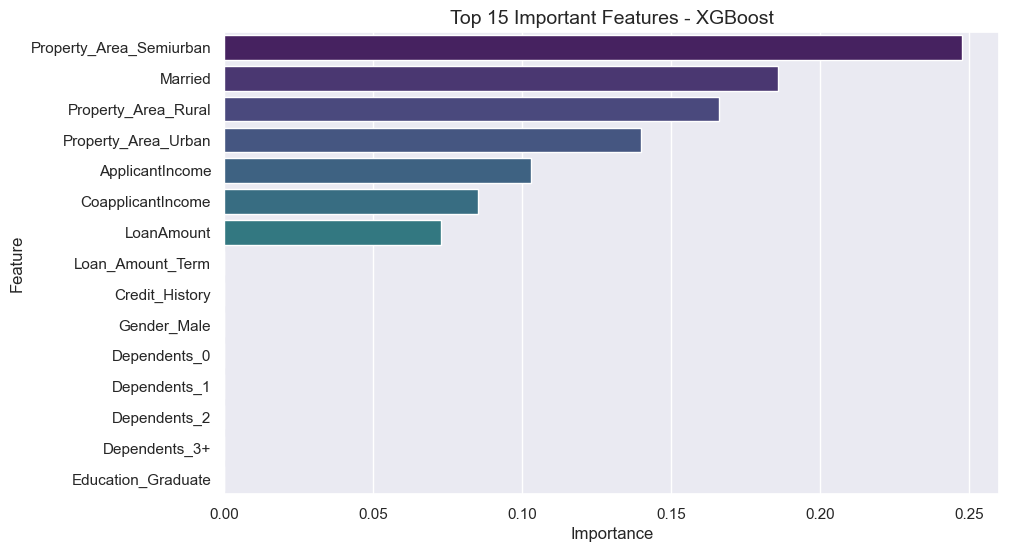

In [98]:
#  Feature Importance Function

def plot_feature_importance(model, X, model_name="Model"):
    feature_importances = model.feature_importances_
    print(feature_importances)
    features = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(10,6))
    sns.barplot(x="Importance", y="Feature", data=features.head(15), palette="viridis")
    plt.title(f"Top 15 Important Features - {model_name}", fontsize=14)
    plt.show()

# # Random Forest Feature Importance
# plot_feature_importance(rf, pd.DataFrame(X_train, columns=df.drop('Loan_Status', axis=1).columns), "Random Forest")

# XGBoost Feature Importance
plot_feature_importance(xgb, pd.DataFrame(X_train, columns=df.drop('Loan_Status', axis=1).columns), "XGBoost")


## Final Insights

### - Loan eligibility is strongly influenced by property area (Semiurban/Urban) and marital status in this dataset.

### - Applicant income and coapplicant income are important but not the top deciding factors.

### - Credit history, which usually plays a big role, is less impactful here — possibly due to data distribution or correlations.

### - Gender, dependents, and education show minimal influence on loan approval.

### - Among models tested, XGBoost performed best and would be the most suitable for deployment.